In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS
import re
import random

In [2]:
df=pd.read_csv(r'3.1-data-sheet-udemy-courses-business-courses.csv')
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance


In [3]:
# check and remove null rows

print(df.shape)
df[df['course_id'].isnull()]
df = df[~df['course_id'].isnull()]
print(df.shape)

(1192, 12)
(1191, 12)


In [4]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance


In [5]:
# explore data

# what are the subjects

df.subject.unique()

# there is only one subject : business finance

array(['Business Finance'], dtype=object)

In [6]:
# what are the courses

len(df.course_title.unique())
# each row is a distinct course

1191

In [7]:
# explore the timespan

print(df.published_timestamp.min())
print(df.published_timestamp.max())

2012-06-27T16:41:09Z
2017-07-06T21:46:30Z


In [8]:
# what are the levels in the course
df.level.unique()

# All Levels, Beginner Level, Intermediate Level, Expert Level

array(['All Levels', 'Beginner Level', 'Intermediate Level',
       'Expert Level'], dtype=object)

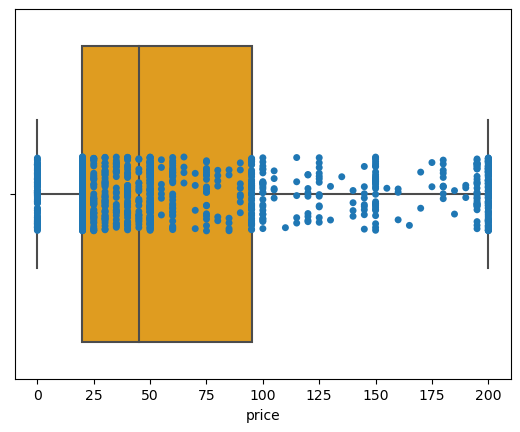

In [9]:
# to encode the price range, first take a look at the stats of price

sns.boxplot(x = df['price'] , color = 'orange') 
sns.stripplot(x = df['price'])
plt.savefig('figures/boxplot_price.png')

In [10]:
# find the threshold price for quartiles
np.quantile(df['price'],[0,0.25,0.5,0.75])

array([ 0., 20., 45., 95.])

In [11]:
# function : to add columns for year, price category and label encoding for the levels
# input: df
# output: updated df
    # encode price into free, low-price, mid-price and high-price

    
df['price_cat']=np.where(df['price']==0, 'free',np.where(df['price']<45, 'low-price',np.where(df['price']< 95, 'mid-price', 'high-price')))

# encode level into numericals
le = preprocessing.LabelEncoder()
df['level_encoded']=le.fit_transform(df['level'])

# get year from published_timestamp
df['year']=df['published_timestamp'].str[:4].astype(int)
type(df)


pandas.core.frame.DataFrame

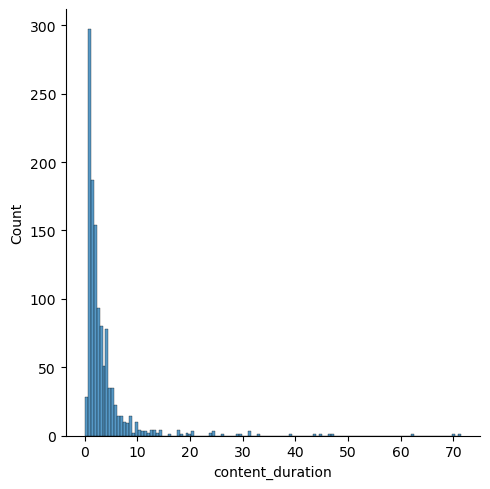

In [12]:
sns.displot(df['content_duration'])
plt.savefig('figures/hist_duration.png')

Text(0.5, 1.0, '')

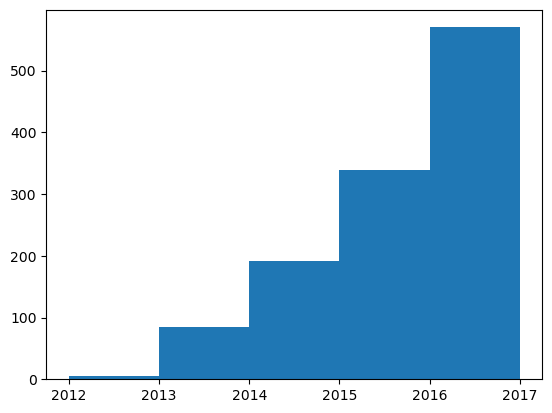

In [13]:
plt.hist(df['year'], bins = 5)
plt.savefig('figures/hist_year.png')
plt.title('')

In [14]:
# find number of subscribers of each level
by_level = df.groupby('level')[['num_subscribers']].sum()

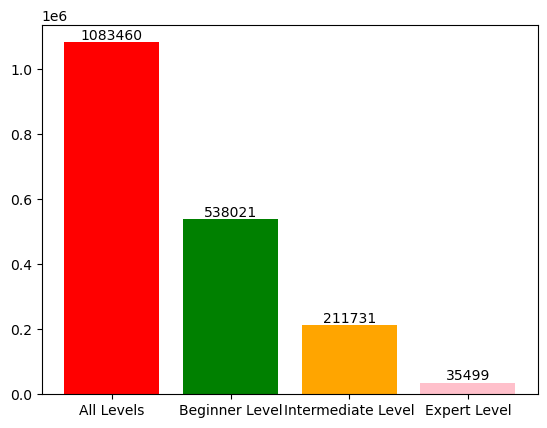

In [15]:
# format the data to have columns in order
by_level = by_level.T
by_level=by_level[['All Levels','Beginner Level','Intermediate Level' ,'Expert Level']].T
# plt.bar(by_level.index, height = by_level['num_subscribers'], color = ['red', 'green', 'orange', 'pink'])

fig, ax = plt.subplots()
bars = ax.bar(by_level.index, height = by_level['num_subscribers'], color = ['red', 'green', 'orange', 'pink'])

ax.bar_label(bars, fmt = '%d')

plt.savefig('figures/level_number_of_subs.png')

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

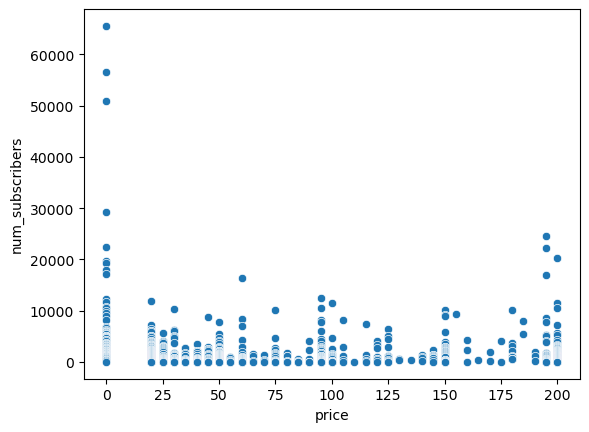

In [16]:
sns.scatterplot(x=df.price, y = df.num_subscribers)


Text(0.5, 1.0, 'Evolution of number of subscribers by year')

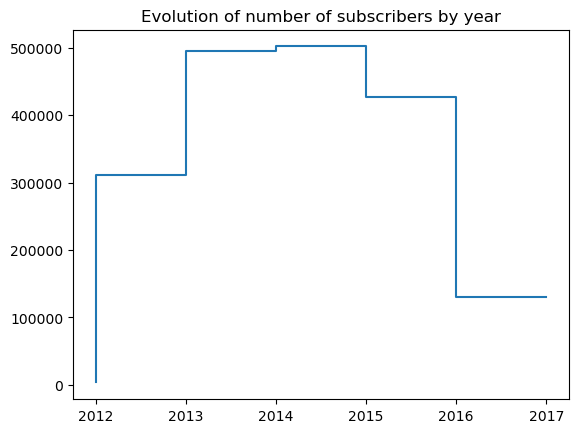

In [17]:
# evolution of number of subscribers per year
by_year = df.groupby('year')[['num_subscribers']].sum()
plt.step(by_year.index, by_year['num_subscribers'])
plt.title('Evolution of number of subscribers by year')

Text(0.5, 1.0, 'Number of courses published per year (plot, matplotlib)')

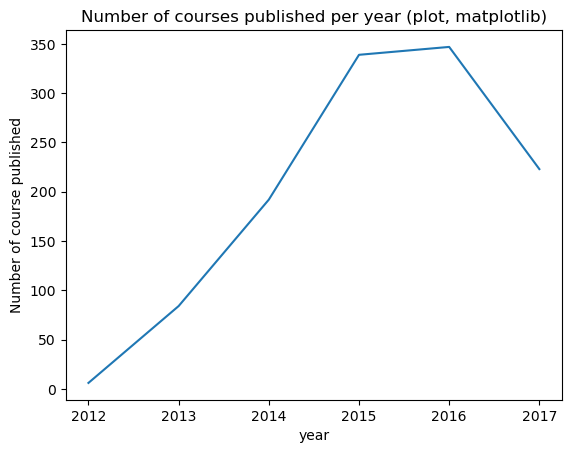

In [18]:
# number of courses published per year (line)

df_course_year=pd.DataFrame(df['year'].value_counts()).reset_index(drop=False).sort_values('index')
df_course_year


plt.plot(df_course_year['index'],df_course_year['year'])
plt.ylabel('Number of course published')
plt.xlabel('year')
plt.title('Number of courses published per year (plot, matplotlib)')


<AxesSubplot:xlabel='level'>

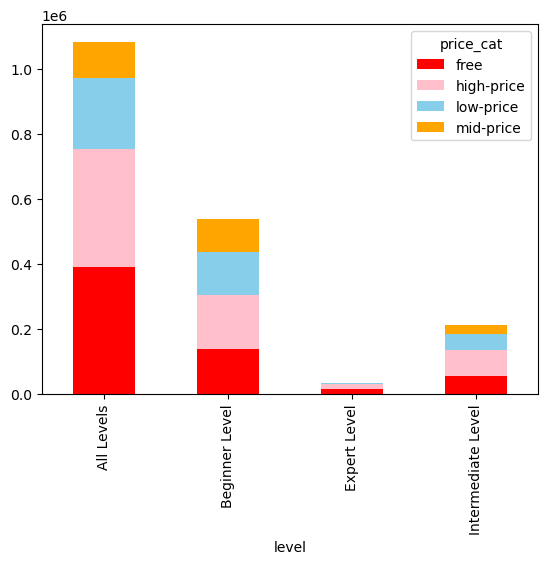

In [19]:
level_price = df.pivot_table(index = 'level',columns= 'price_cat', values = 'num_subscribers', aggfunc = np.sum)
level_price.plot(kind = 'bar', stacked = True, color=['red', 'pink','skyblue', 'orange']) 


Text(0.5, 1.0, 'price per course per year (violin, seaborn)')

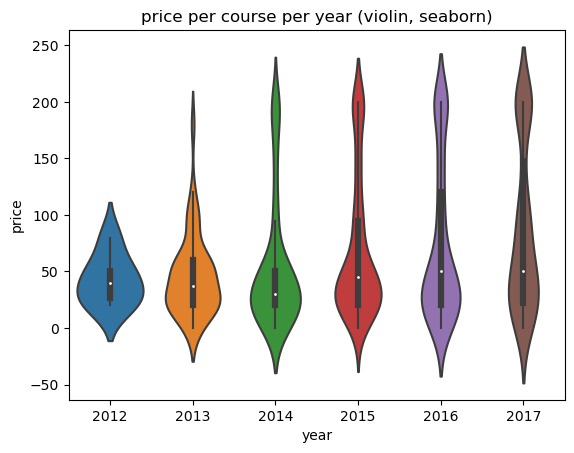

In [20]:
#  avg price of course per year - box plot type thing



sns.violinplot(data=df, x="year", y="price",size=1)
plt.title('price per course per year (violin, seaborn)')

<AxesSubplot:xlabel='price_cat', ylabel='total numbe rof subscribers'>

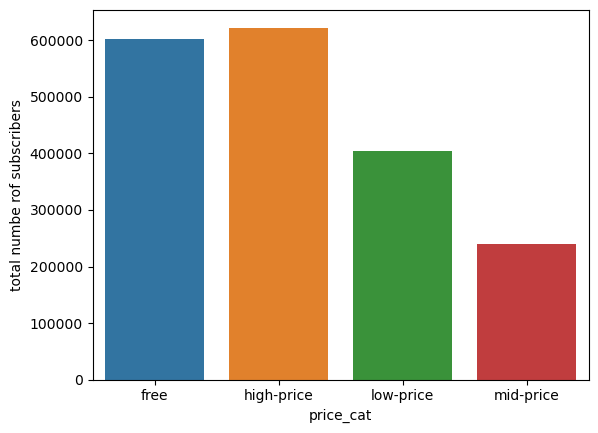

In [36]:
#sns.barplot(x=df['price_cat'], y= df['num_subscribers'].sum())
df_price_n_subscribers=pd.crosstab(index= df['price_cat'], columns='total numbe rof subscribers', values=df['num_subscribers'], aggfunc=np.sum)

sns.barplot(x=df_price_n_subscribers.index, y=df_price_n_subscribers['total numbe rof subscribers'])



Text(0.5, 1.0, 'Violin plot showing spread for number of lectures per course (matplotlib)')

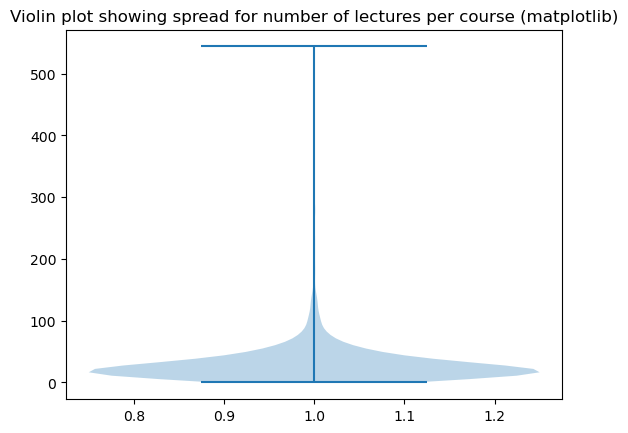

In [26]:
# Violin plot for number of lectures per course

plt.violinplot(df['num_lectures'])
plt.title('Violin plot showing spread for number of lectures per course (matplotlib)')

Text(0.5, 1.0, 'Pie chart showing the repartition of course levels')

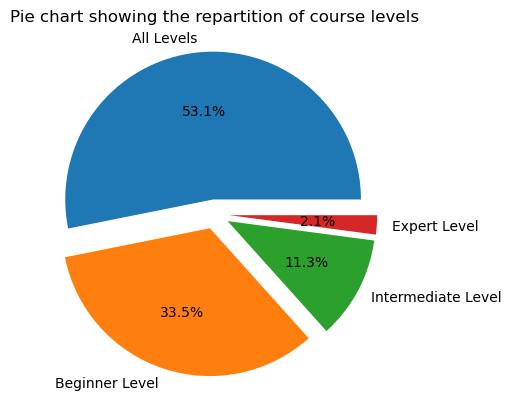

In [22]:
# pie chart showing repartition of course levels

df_levels= df['level'].value_counts()
df_levels.index
explode = (0.1, 0.1, 0.1, 0.1) 
plt.pie(x=df_levels, labels=df_levels.index,normalize=True, autopct='%1.1f%%', explode=explode)

plt.title('Pie chart showing the repartition of course levels')

Text(0.5, 1.0, 'Content duration by course level')

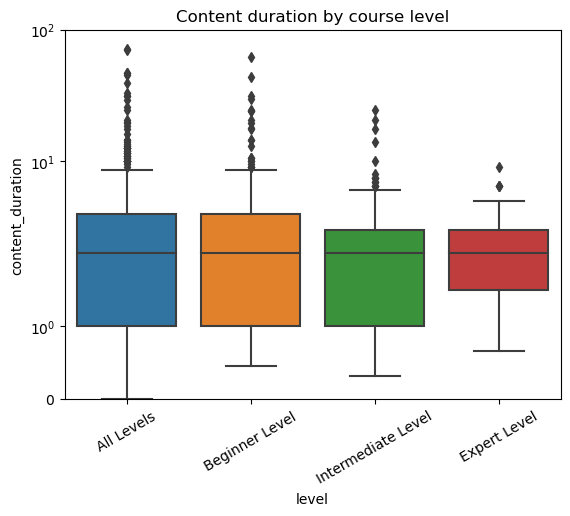

In [48]:
#boxplot - duration per course level
sns.boxplot(x=df['level'],y=df['content_duration'])
plt.yscale('symlog')
plt.ylim(0,100)
plt.xticks(rotation=30)
plt.title('Content duration by course level')

## Regression

<AxesSubplot:>

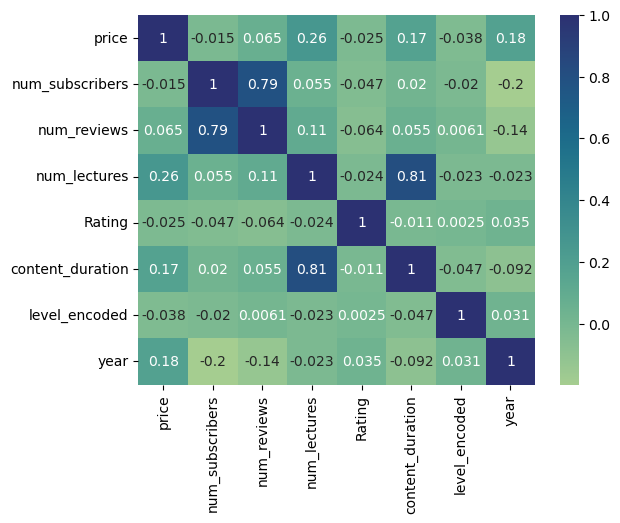

In [23]:
# before starting regression analysis, let's take a look at the heapmap
df_corr=df[['price','num_subscribers','num_reviews','num_lectures','Rating','content_duration','level_encoded','year']].corr()
df_corr
sns.heatmap(df_corr, cmap='crest', annot=True)

In [24]:
# from the heapmap we see that there's no significant correlation between factors :(

#Function - to see correlation based on price category
    # input = price category
    # output = heatmap
def heatmap_pricecat(cat):
    df_corr=df.loc[(df['price_cat']==cat),['price','num_subscribers','num_reviews','num_lectures','Rating','content_duration','level_encoded','year']]
    return sns.heatmap(df_corr.corr(), cmap='crest', annot=True)

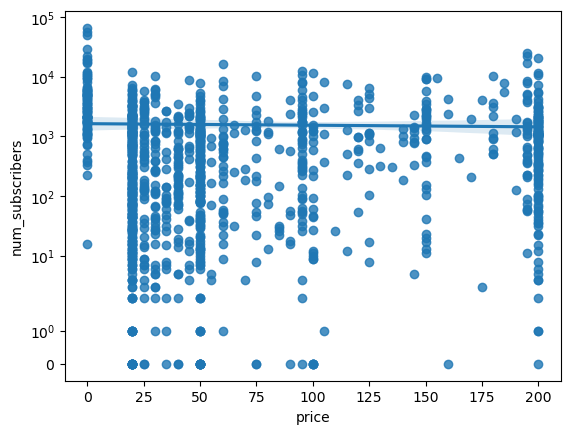

In [42]:
# 1 price vs number of subsribers 
sns.regplot(x=df.price,y=df.num_subscribers)
plt.yscale('symlog')

<AxesSubplot:xlabel='num_lectures', ylabel='num_subscribers'>

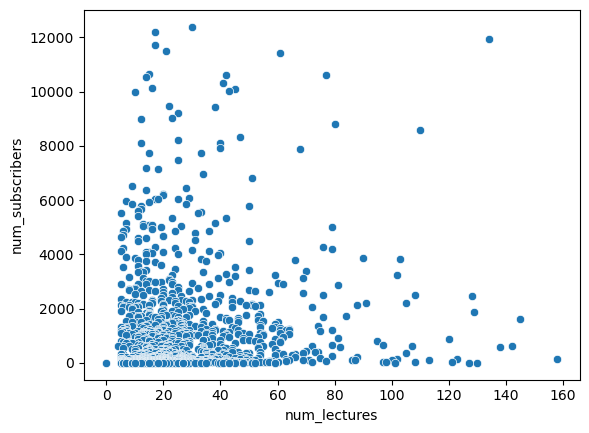

In [27]:
df_lec=df.loc[(np.abs(stats.zscore(df['num_lectures'])<3))& (np.abs(stats.zscore(df['num_subscribers'])<3)), ['num_subscribers', 'num_lectures']]
#supplementary looking at num of lectures vs num of subscribers
sns.scatterplot(data=df_lec, x='num_lectures', y='num_subscribers')

In [28]:
# since there are records where a course has number of subscribers = 0 but rating <> 0, we remove those rows
exclulde_0_subs = df[df['num_subscribers']>0]

<AxesSubplot:xlabel='content_duration', ylabel='Rating'>

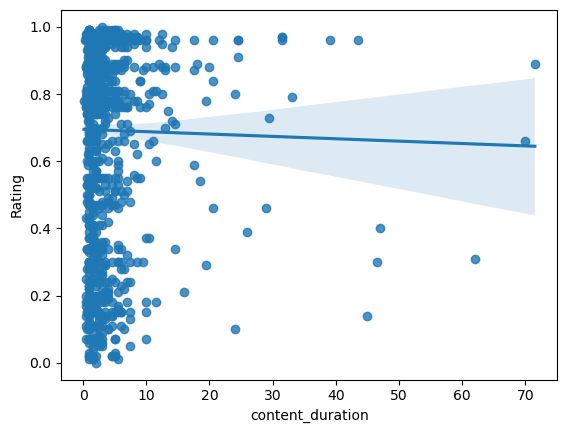

In [29]:
sns.regplot(x = exclulde_0_subs.content_duration, y = exclulde_0_subs.Rating)

<AxesSubplot:xlabel='num_subscribers', ylabel='Rating'>

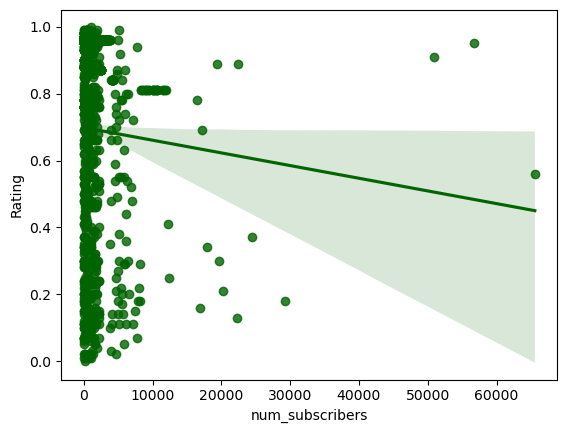

In [30]:
sns.regplot(x = exclulde_0_subs.num_subscribers, y = exclulde_0_subs.Rating, color = 'darkgreen')

In [31]:
#3d plots
## price vs number of subsribers vs duration since published (3D charts)
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

def three_D_chart(X,Y, x_name,y_name, z_name):
   # X = df[['price', 'content_duration']].values.reshape(-1,2)
    #Y = df['num_subscribers']
    
    X=X.values.reshape(-1,2)
    #Y=Y.values.reshape(1,1)

    x = X[:, 0]
    y = X[:, 1]
    z = Y
    max(x)

    x_pred = np.linspace(min(x), max(x), int(max(x)))      # range of porosity values
    y_pred = np.linspace(min(y), max(y), int(max(y)))  # range of VR values
    xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
    model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

    ols = linear_model.LinearRegression()
    model = ols.fit(X, Y)
    predicted = model.predict(model_viz)

    r2 = model.score(X, Y)

    plt.style.use('default')

    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    axes = [ax1, ax2, ax3]

    for ax in axes:
        ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
        ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
        ax.set_xlabel(x_name, fontsize=12)
        ax.set_ylabel(y_name, fontsize=12)
        ax.set_zlabel(z_name, fontsize=12)
        ax.locator_params(nbins=4, axis='x')
        ax.locator_params(nbins=5, axis='x')

    #code below rotates the graphs

    ax1.text2D(0.2, 0.32,'', fontsize=13, ha='center', va='center',
               transform=ax1.transAxes, color='grey', alpha=0.5)
    ax2.text2D(0.3, 0.42, '',fontsize=13, ha='center', va='center',
               transform=ax2.transAxes, color='grey', alpha=0.5)
    ax3.text2D(0.85, 0.85,'', fontsize=13, ha='center', va='center',
               transform=ax3.transAxes, color='grey', alpha=0.5)

    ax1.view_init(elev=27, azim=112)
    ax2.view_init(elev=16, azim=-51)
    ax3.view_init(elev=60, azim=165)

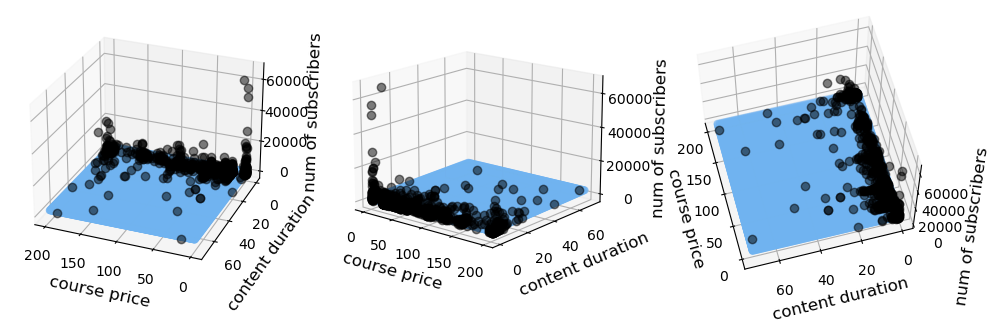

In [32]:
three_D_chart(df[['price', 'content_duration']],df['num_subscribers'], 'course price', 'content duration', 'num of subscribers')
    #Y = df['num_subscribers']

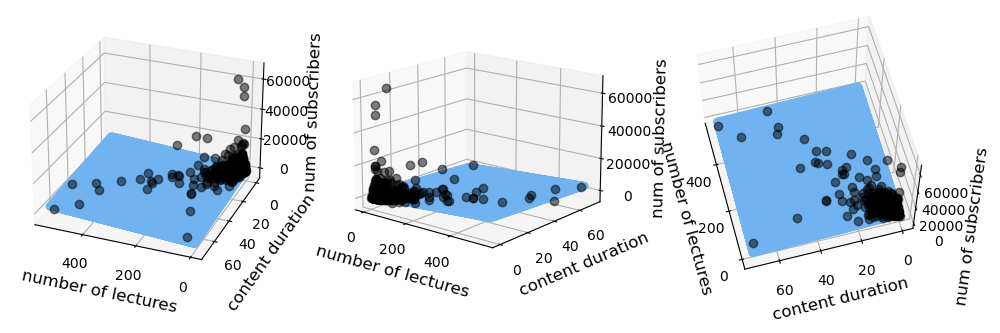

In [33]:
#calling 3D chart function to show num_lectures vs content duration vs num of subscribers

three_D_chart(df[['num_lectures', 'content_duration']],df['num_subscribers'], 'number of lectures', 'content duration', 'num of subscribers')
    #Y = df['num_subscribers']

Text(0.5, 9.444444444444438, 'Price Category')

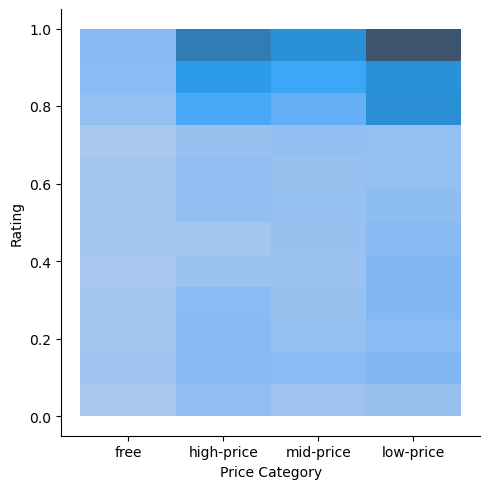

In [35]:
# plot out the distribution of ratings in terms of price category

price_rate = df[['price_cat', 'Rating']]
price_rate

sns.displot(data = price_rate, x = price_rate.price_cat, y = price_rate.Rating)
plt.xlabel('Price Category')

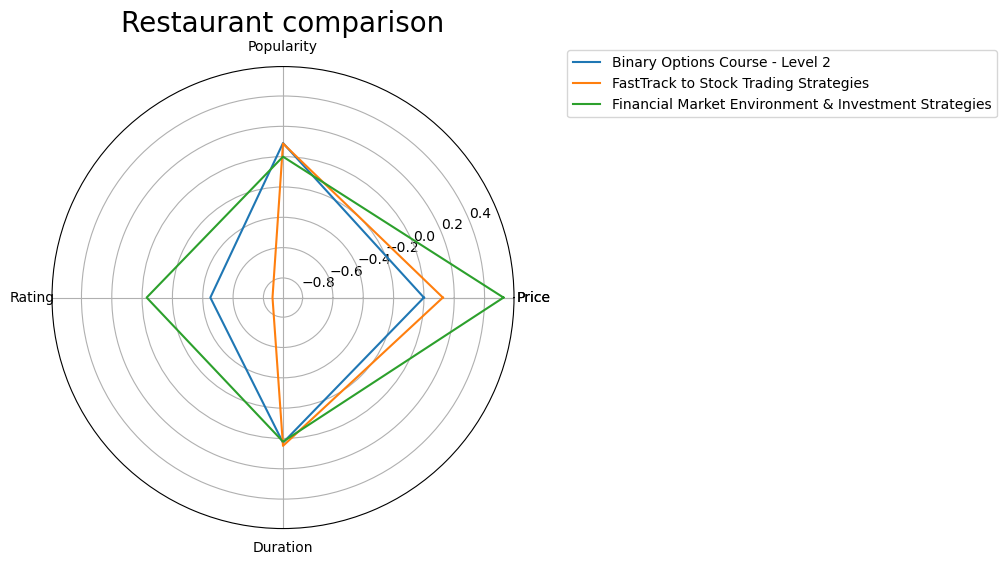

In [34]:
# radar chart

# build a radar chart on four dimensions: price, popularity(number of subscribers) , rating, duration


# course1 = random.choices(df.course_title)[0]
# course2 = random.choices(df.course_title)[0]
# course3 = random.choices(df.course_title)[0]
# 
# courses = [course1, course2, course3]

# hardcode some courses cause they look clearer in this chart :)
courses = ['Binary Options Course - Level 2', 'FastTrack to Stock Trading Strategies', 'Financial Market Environment & Investment Strategies']
# print(courses)
categories = ['Price', 'Popularity', 'Rating', 'Duration']
categories = [*categories, categories[0]]

# calculate max and min for each dimension
price_max = df.price.max()
price_min = df.price.min()
popularity_max = df.num_subscribers.max()
popularity_min = df.num_subscribers.min()
rating_max = df.Rating.max()
rating_min = df.Rating.min()
duration_max = df.content_duration.max()
duration_min = df.content_duration.min()

# print(courses)



plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
for i, course in enumerate(courses):
#     print(i, course)
    course_price = df[df['course_title']==course]['price'].values[0]
#     print(course_price)
    course_pop = df[df['course_title']==course]['num_subscribers'].values[0]
#     print(course_pop)
    course_rating = df[df['course_title']==course]['Rating'].values[0]
#     print(course_rating)
    course_duration = df[df['course_title']==course]['content_duration'].values[0]                         
#     print(course_duration)
                         
                         
                         
    price_score = (course_price - price_min)/(price_max - price_min)
    pop_score = (course_pop - popularity_min) / (popularity_max - popularity_min)
    rating_score = (course_rating - rating_max) / (rating_max - rating_min)
    duration_score = (course_duration - duration_min) / (duration_max - duration_min)


    course_scores = [price_score, pop_score, rating_score, duration_score]
    course_scores = [*course_scores, course_scores[0]]
#     print(course_scores)
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(course_scores))


    plt.plot(label_loc, course_scores, label=f'{course}')

plt.title('Restaurant comparison', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(bbox_to_anchor=(1.1,1.05), loc = 'upper left')
plt.show()

In [37]:
#### fancy chart

# get all the words in the course title
all_the_words = ' '.join([w.lower() for w in df.course_title]).split()

# clean up the words
text_c = re.sub('[^A-Za-z0-9°]+', ' ', str(all_the_words))
text_c = text_c.replace('\n', '').lower()


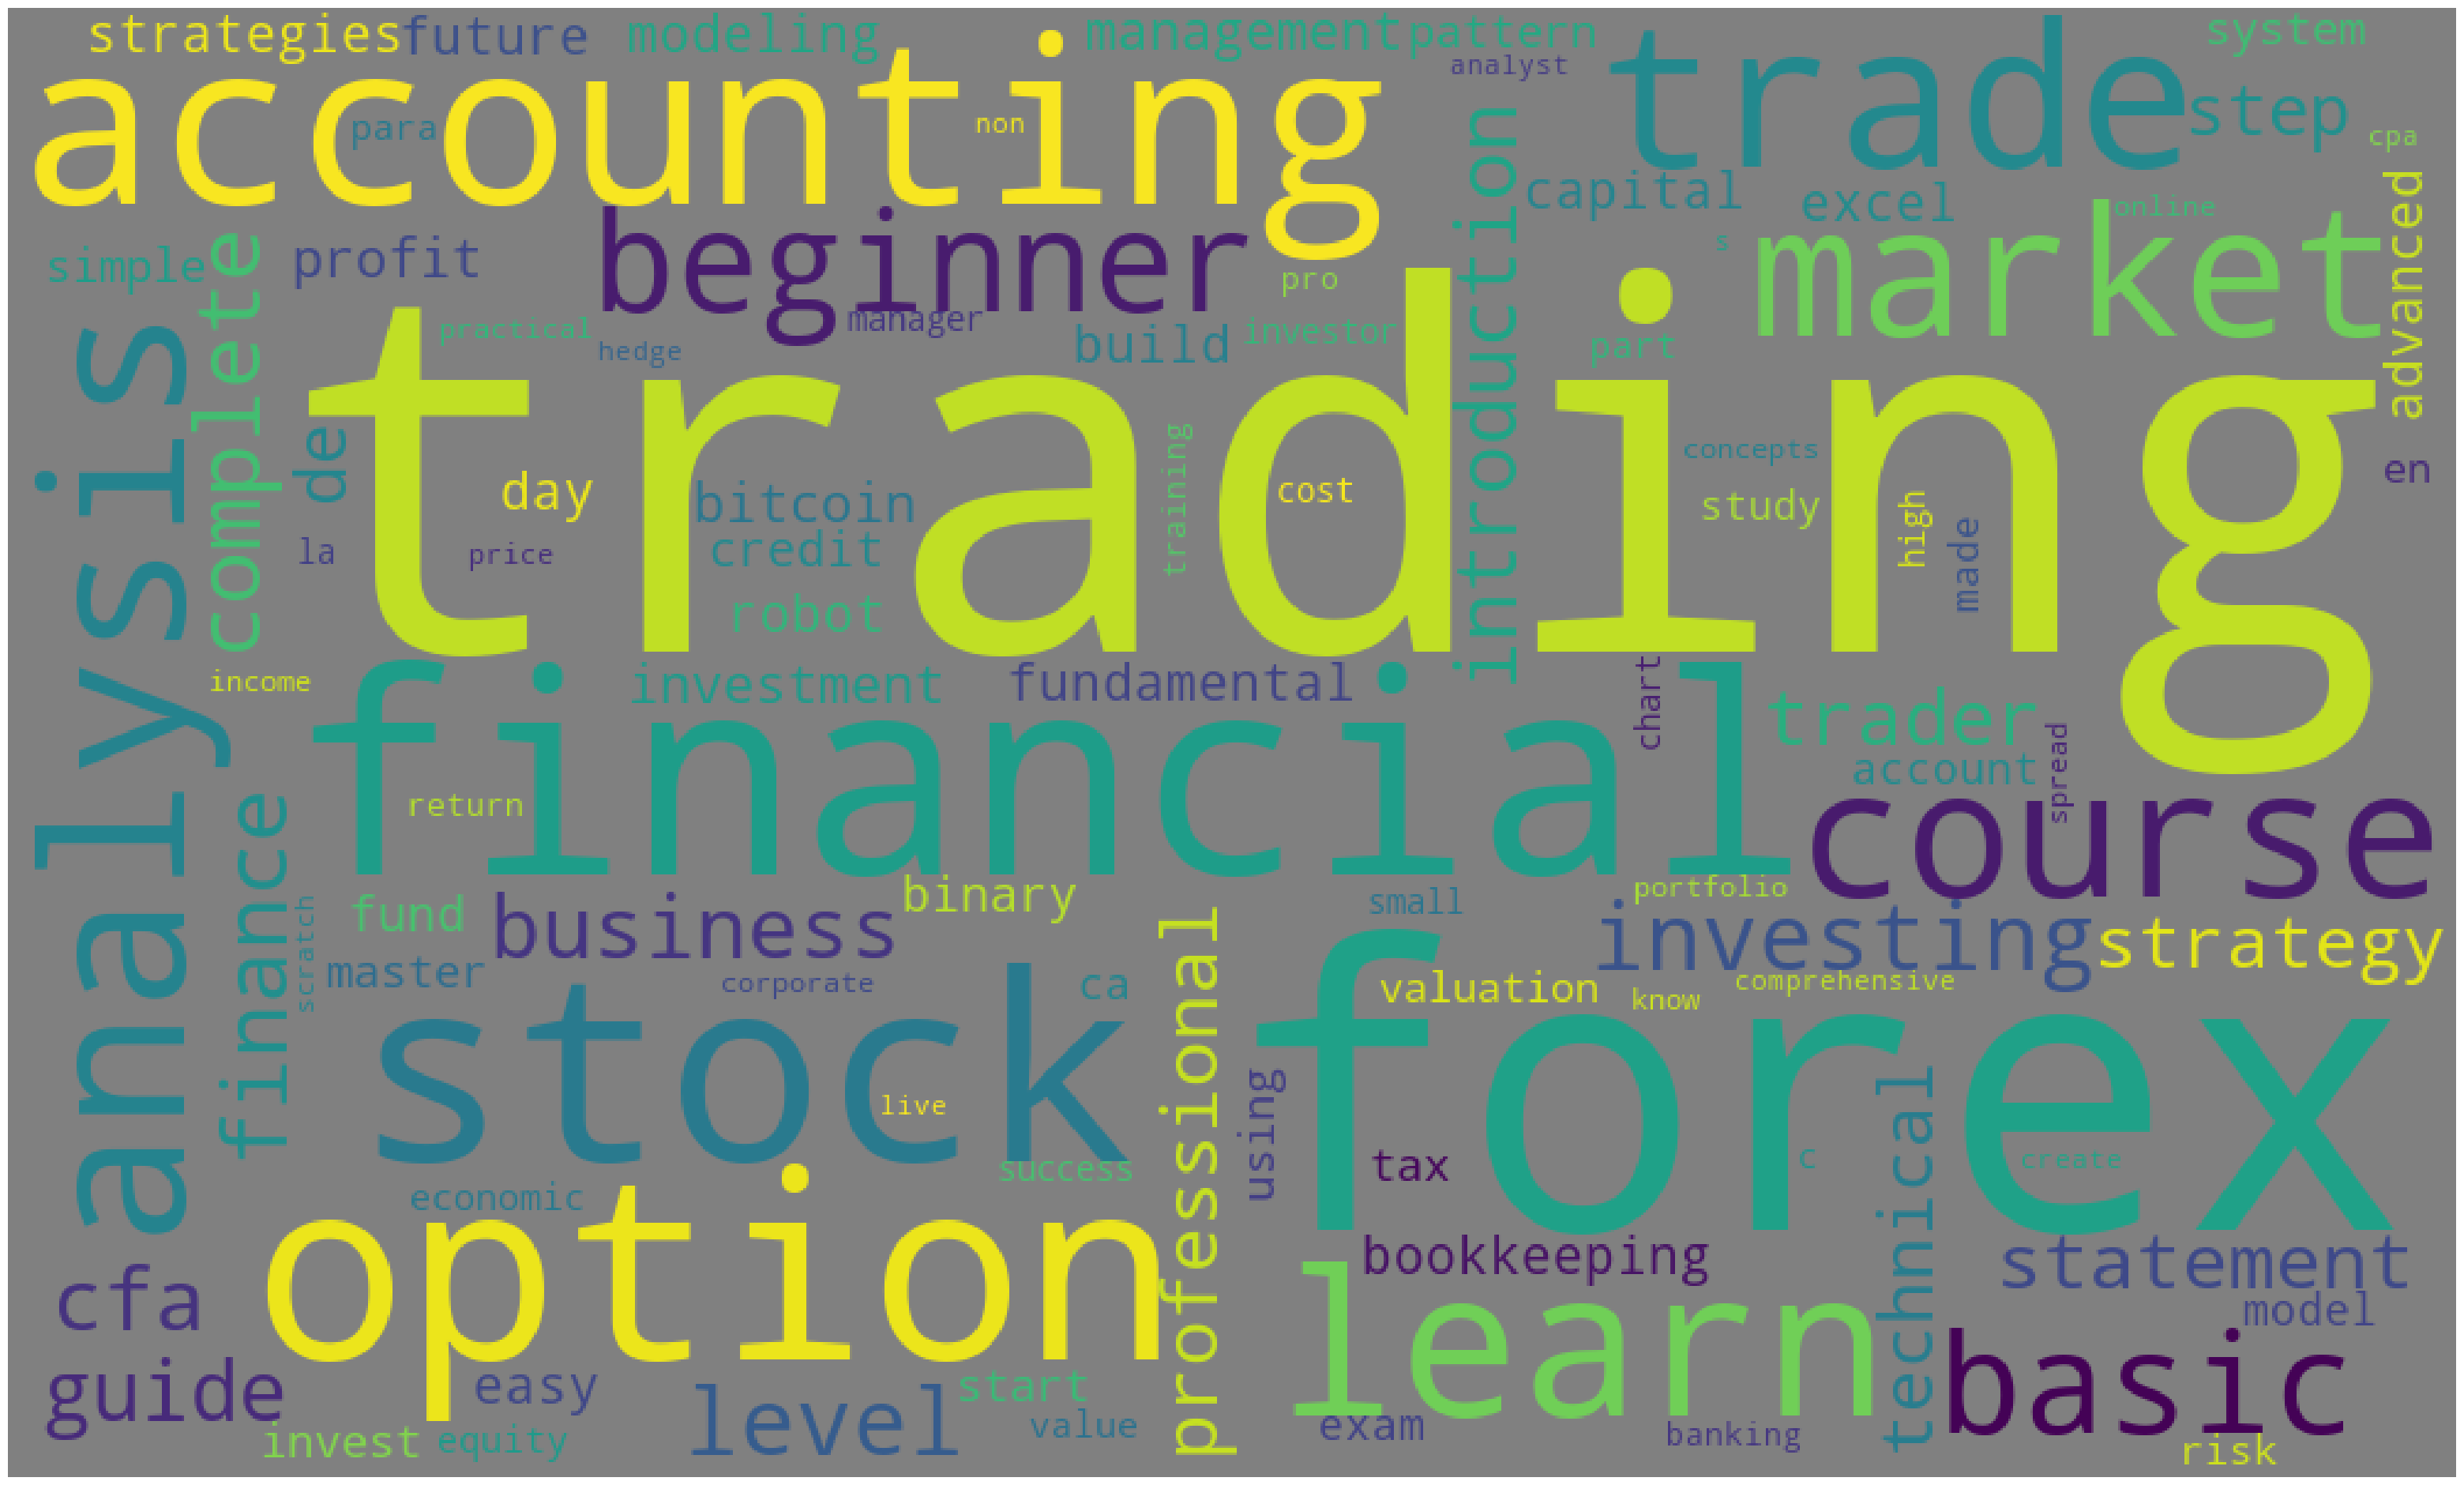

<Figure size 640x480 with 0 Axes>

In [38]:
# use wordcloud to generate the fancy  chart
wordcloud = WordCloud(width= 1000, height = 600, max_words=100,
                      random_state=1, background_color='gray', colormap='viridis_r',
                      collocations=False, stopwords = STOPWORDS).generate(text_c)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()
plt.savefig('word_freq.jpg')

In [39]:
# see the top 100 hot words
words = text_c.split()
word_set_raw = set(words)
# print(word_set_raw)
word_set = [i for i in word_set_raw if i not in STOPWORDS]
word_count = [words.count(i) for i in word_set]

word_freq = pd.DataFrame(zip(word_set, word_count), columns = ['word', 'count'])

<BarContainer object of 20 artists>

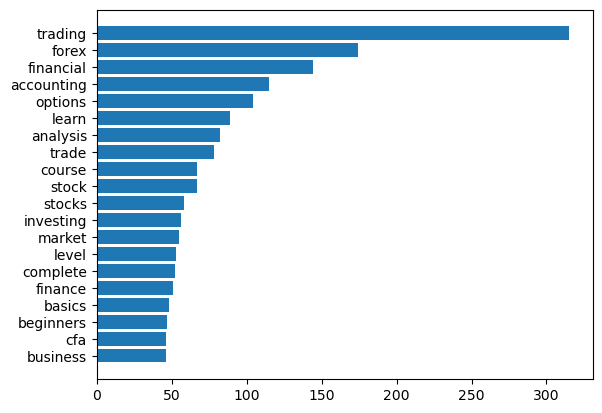

In [40]:
word_freq.sort_values(by='count', inplace = True)
word_freq = word_freq.iloc[-20:]
# print(word_freq.shape)
plt.barh(y=word_freq['word'], width = word_freq['count'])

Text(0.5, 1.0, 'Rating vs price for Trading courses')

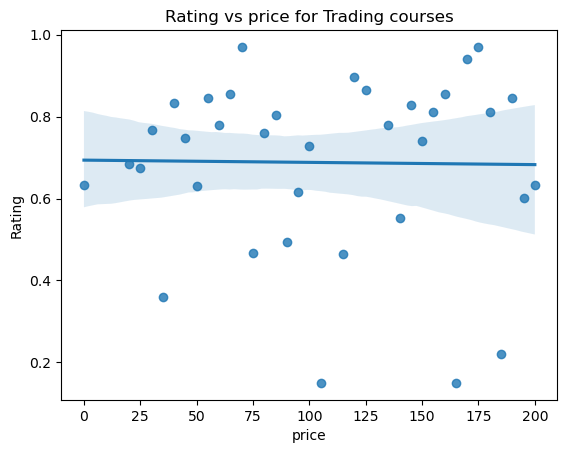

In [41]:
df_trading=df.loc[df['course_title'].str.lower().str.contains('trading'),:]

df_trading=df_trading.pivot_table(index='price',)

sns.regplot(x=df_trading.index, y= df_trading['Rating'])
plt.title('Rating vs price for Trading courses')